In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import os

In [2]:
def HenonMap(x, y, a, b):
    xnew = 1 - a*x*x + y
    ynew = b*x
    return (xnew, ynew)

In [3]:
def MyTSGen(RecCounter, RecUpperLim, TS_Len, a, b):
    RecCounter = RecCounter+1 #counts # times recursion function has been called.
    if RecCounter<RecUpperLim:
        n = 0 #counter for length of TS.
        xTS = [np.random.uniform(-1.0, 1.0)]
        yTS = [np.random.uniform(-1.0, 1.0)]
        
        while n<TS_Len-1:
            n = n+1
            xn, yn = HenonMap(xTS[n-1], yTS[n-1], a, b)
            xTS.append(xn)
            yTS.append(yn)
            #---
            if abs(xn)>2.5:
                #print (RecCounter, len(AllTS))
                RecCounter, xTS, yTS = MyTSGen(RecCounter, RecUpperLim, TS_Len, a, b)
                break
            #---
        return(RecCounter, xTS, yTS)

In [4]:
RecUpperLim = 100

In [5]:
dis = 5000
N = 100

In [6]:
# Parameter values:
b = 0.3

a_start, a_stop = 1.0, 1.3

N_a = 3001

a_List = np.linspace(a_start, a_stop, N_a)

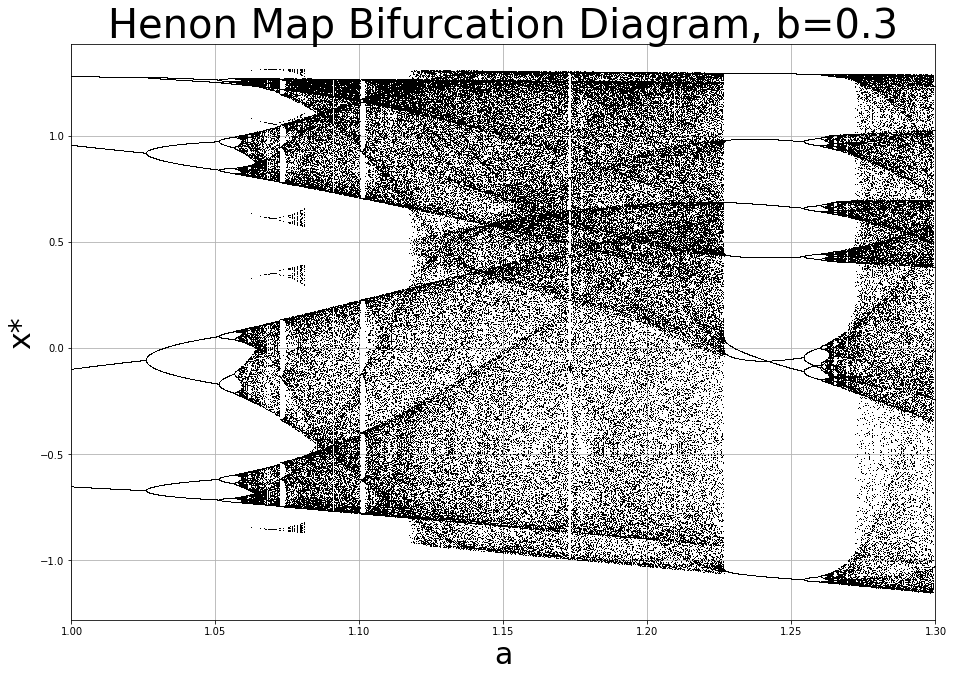

CPU times: user 36.1 s, sys: 179 ms, total: 36.3 s
Wall time: 36.4 s


In [7]:
%%time
#-----
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
#-----
for a in a_List:
    RecCounter = 0
    RecCounter, xTS, yTS = MyTSGen(RecCounter, RecUpperLim, dis+N, a, b)
    ax.plot([a]*N, xTS[dis:], "k,")
#---
ax.set_xlim([a_start, a_stop])

ax.set_xlabel("a", fontsize=30)
ax.set_ylabel("x*", fontsize=30)
ax.set_title("Henon Map Bifurcation Diagram, b={}".format(b), fontsize=40)

ax.grid()
plt.show()

I AM HERE!!!

WHAT IS THAT PART BETWEEN a=1.22 AND a=1.25 WHERE THE TWO LINES CROSS?